In [17]:
import matplotlib 
import matplotlib.pyplot as plt
from collections import Counter
import pymc3 as pm
import numpy.random as npr
import numpy as np
from numpy import random
import theano
import theano.tensor as T
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
% matplotlib inline

# Bayesian Statistical Analysis with PyMC3

Vladimir-Vadim Iurcovschi, MSc, Data Scientist at Warply

Athens PyData, 2008

- HTML Notebook on GitHub: https://github.com/VladimirI23/PyData-Athens-Talk.git

### Talk features

- __Minimal field jargon__: we will focus on the mechanics of analysis, rather than the terminology, heavy math concepts, A/B testing, spike and slab regression, conjugate and Jeffreys priors ...

- __Pareto Principle__: we belive that the basics will get you to the 80% of what you will need to get the job done.

- __Enjoy the Talk__: some really exciting stuff ahead!

### Examples used in the talk:

1. The biased coin problem

2. Bayesian Linear regression

3. Coal Mining Disasters

4. Stochastic Volatility

5. Customer Lifetime Value

### Assumed Knowledge 

- Familiarity with Python:
    -  __contex manager syntax__
    -  __objects & methods__

- Knowledge of basic statistical termonology
    - __mean__
    - __variance__
    - __interval__

### Some basic distributions

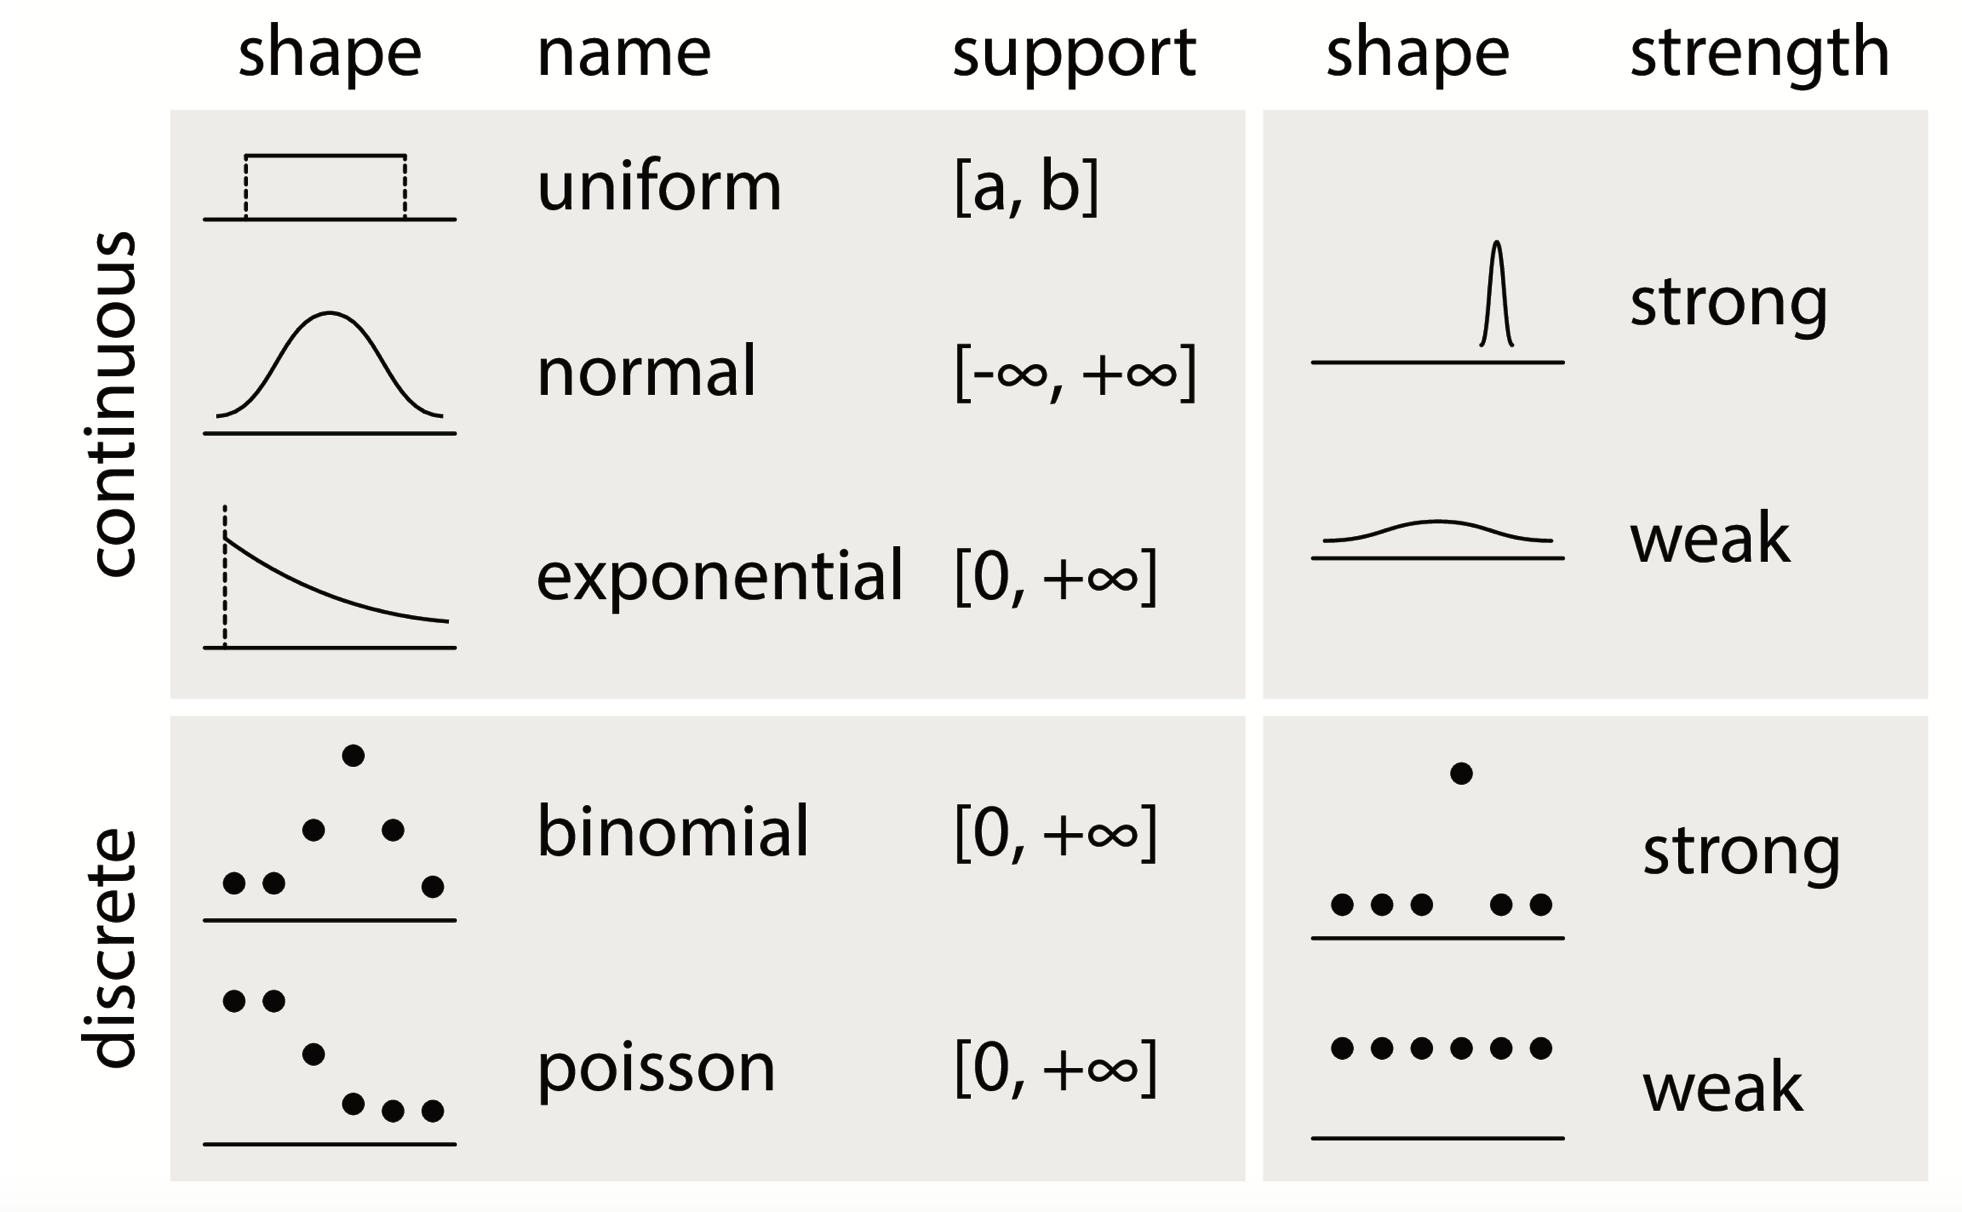

In [2]:
from IPython.core.display import Image
Image(filename= "/Users/vlad/Desktop/Warply talk/image_1.png", width=800, height=600)

### Bayes Rule 

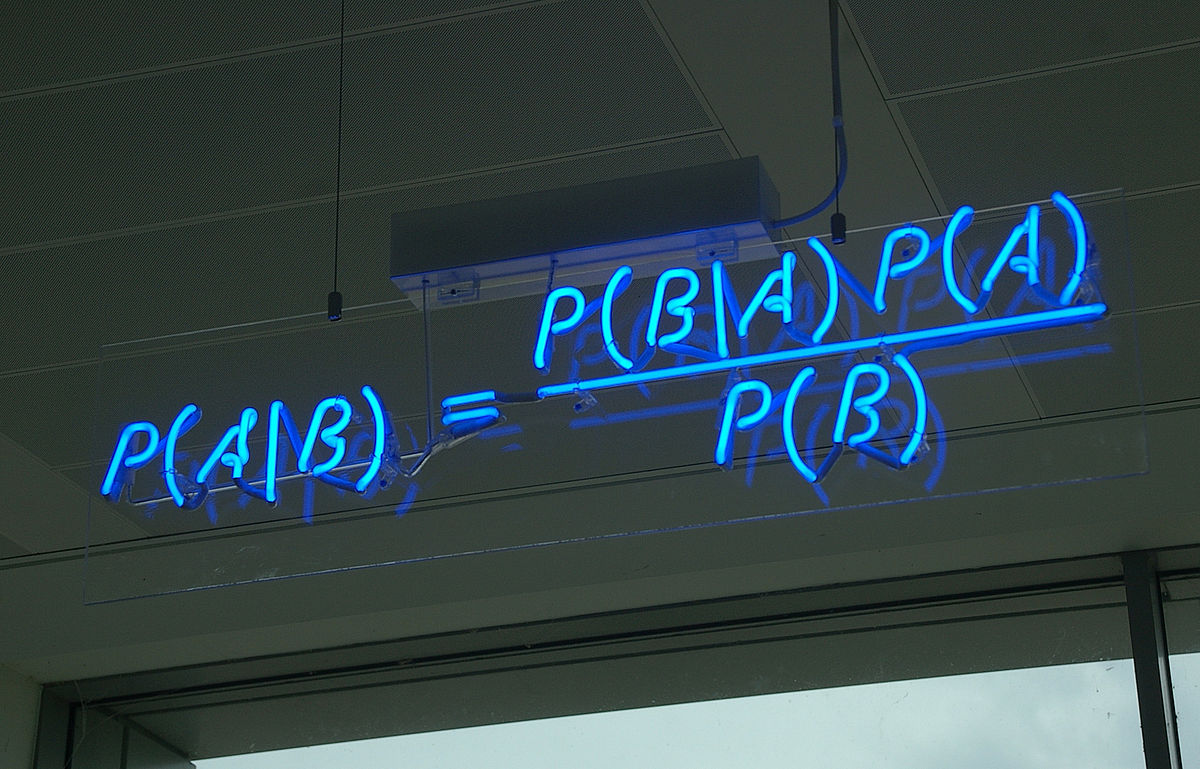

In [6]:
from IPython.core.display import Image
Image(filename= "/Users/vlad/Desktop/Warply talk/Bayes_rule.jpg", width=800, height=600)

In [109]:
%%latex

\begin{align}
\\
\LARGE
\hspace{8 cm} P(Θ|y) = \frac{P(y|Θ)P(Θ)}{P(y)}\newline
\\
\end{align}

<IPython.core.display.Latex object>

In [141]:
%%latex
\begin{align}
\\
\large
\hspace{-9.0cm} 1.\, Posterior: P(Θ|y)\newline
    
\large
\hspace{-9.0cm} 2.\,Likelihood: P(y|Θ)\newline

\large
\hspace{-9.0cm} 3.\,Prior: P(Θ)\newline
    
\large
\hspace{0.99cm} 4.\,Data\,Marginal\,(Evidence): P(y)\newline
\\
\end{align}

<IPython.core.display.Latex object>

### Equivalent form

In [142]:
%%latex

\begin{align}
\\
\LARGE
\hspace{8 cm} P(Θ|y) = \frac{P(y|Θ)P(Θ)}{\int_Θ \ P(y|φ)P(φ) \,dφ}\newline
\\
\end{align}

<IPython.core.display.Latex object>

In [146]:
%%latex

\begin{align}
\\
\LARGE
\hspace{8 cm} P(Θ|y) \propto \ P(y|Θ)P(Θ)\newline
\\
\end{align}

<IPython.core.display.Latex object>

## Bayesian thinking 

#### Update beliefs having seen the evidence 

Once the posterior distribution is available, we can compute:

- The __Mean__ of θ
- The __Variance__ of θ
- __95% highest posterior density (HDP)__

Most Bayesian inference problems can be succinctly expressed as the expectation of a function of interest g(θ), evaluated over the posterior distribution: 

In [166]:
%%latex

\begin{align}
\\
\LARGE
\hspace{8 cm} E(g(θ)|y) = \int_Θ \ π(θ|y)g(θ) \,dθ
\\
\end{align}

<IPython.core.display.Latex object>

### So how we can compute the posterior distribution ? 

- __Monte Carlo__: perform multi-dimentional integrals by making independent random draws from the underlying probability distribution.

- __Markov Chain Monte Carlo (MCMC)__: If Monte Carlo is too hard, use correlated random samples instead.

- __PyMC3__ uses a Markov Chain Monte Carlo algorithm to find the full posterior probability distribution of your parameters.

### MCMC Visually 

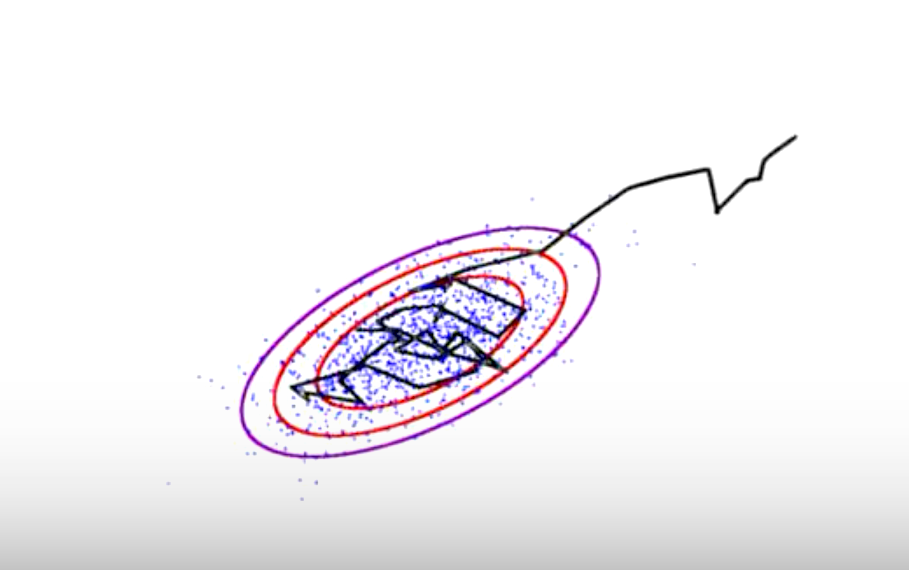

In [143]:
Image(filename= "/Users/vlad/Desktop/Warply talk/mcmc.png", width=800, height=600)

In [54]:
import io
import base64
video = io.open("/Users/vlad/Desktop/7173-7448.mp4", 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''
<video controls>
    <source src="data:video/mp4;base64,{0}" type="video/mp4" />
</video>'''.format(encoded.decode('ascii')))

### PyMC3 has a lot of cool features!

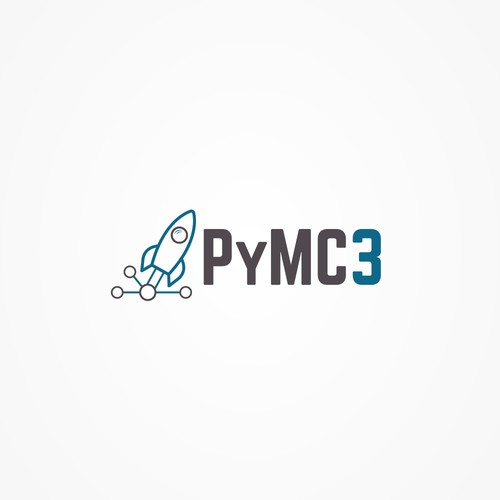

In [170]:
Image(filename= "/Users/vlad/Desktop/Warply talk/pymc3.jpeg", width=800, height=600)

- PyMC3 is a new open source __Probabilistic Programming__ framework written in Python that uses Theano to compute gradients via automatic differentiation as well as compile probabilistic programs  on-the-fly  to  C  for  increased  speed.

- PyMC3 provides and an __intuitive__, __readable__ and __powerful syntax__ that is close to the natural syntax statisticians use to describe models.

-  It features __next-generation Markov chain Monte Carlo (MCMC) sampling algorithms__ such as: __Hamiltonian Monte Carlo (HMC)__ and  __No-U-Turn Sampler (NUTS)__ (Homan and Gelman, 2014), a self-tuning variant of Hamiltonian Monte Carlo.

    -  HMC and NUTS take advantage of gradient information from the likelihood to achieve much __faster convergence__ than traditional sampling methods, especially for larger models.
    
    -  NUTS also has several __self-tuning strategies__ for adaptively setting the tuneable parameters of Hamiltonian Monte Carlo, which means specialized knowledge about how the algorithms work is not required.  

- Active development by specialists

# PyMC3 Installation

PyMC3 can be installed using ‘pip‘:

### pip install pymc3

PyMC3 can be also installed from GitHub, also using 'pip':

### pip install git+https://github.com/pymc-devs/pymc3

PyMC3 depends on several third-party Python packages which will be automatically installed when  installing  via  pip.   The  four  required  dependencies  are: Theano, NumPy, SciPy,  and Matplotlib.  To take full advantage of PyMC3, the optional dependencies Pandas and Patsy should also be installed.

### pip install patsy pandas

### Note:

Sometimes Theano fails to install with 'pip install pymc3'. To solve this problem we have to install Theano separately:

### pip install theano pygpu

or alternatively via 'conda':

### conda install theano pygpu 

Ok, everything works fine! However,if you are a Mac user, when we hit the MCMC button - the algorithm takes forever to converge! Moreover, you get the following warning message: 

### WARNING (theano.configdefaults): g++ not detected ! Theano will be
### unable to execute optimized C-implementations (for both CPU and GPU) and
### will default to Python implementations. Performance will be severely
### degraded. To remove this warning, set Theano flags cxx to an empty string.

### How do I install g++ on MacOS X? - just type 'xcode' on terminal.

# Biased coin problem

I tossed my coin  n times, and it came up as heads  k times. Is it biased?

### Parameterized problem 

"I want to know  p, the probability of tossing heads. Given n tosses and k observed heads, is it probable that the value of  p is close to  0.5, say, in the interval [0.48,0.52] ?"

### Step 1: Before looking at data we have to choose a prior 

- prior belief about parameter:  p∼Uniform(0,1)
 

- likelihood function:  data∼Bernoulli(p)

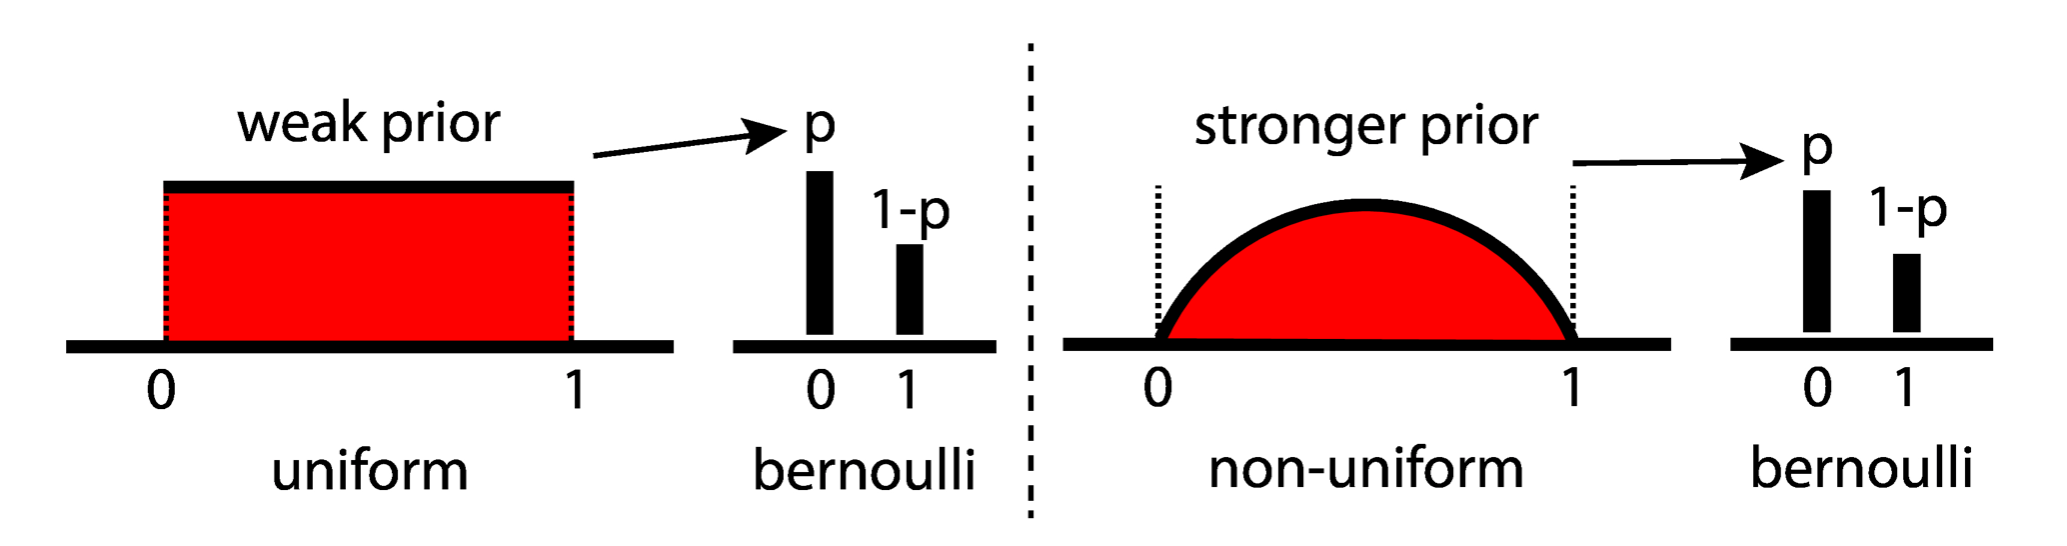

In [175]:
Image(filename= "/Users/vlad/Desktop/Warply talk/cointoss.png", width = 2000, height=2000)

### Step 2:  Define the likelihood 

In [176]:
# Make the data needed for the problem.
from random import shuffle
total = 30
n_heads = 11
n_tails = total - n_heads
tosses = [1] * n_heads + [0] * n_tails
shuffle(tosses)

In [177]:
print(tosses)

[1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1]


In [222]:
def plot_coins():
    fig, ax = plt.subplots(figsize = (8,8))
    ax.bar(list(Counter(tosses).keys()), list(Counter(tosses).values()))
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['tails', 'heads'])
    ax.set_ylim(0, 20)
    ax.set_yticks(np.arange(0, 21, 5))
    ax.grid(True)
    plt.tick_params(axis='both', which='major', labelsize=14)
    ax.set_title('# of Heads vs Tails', size = 20)
    return fig

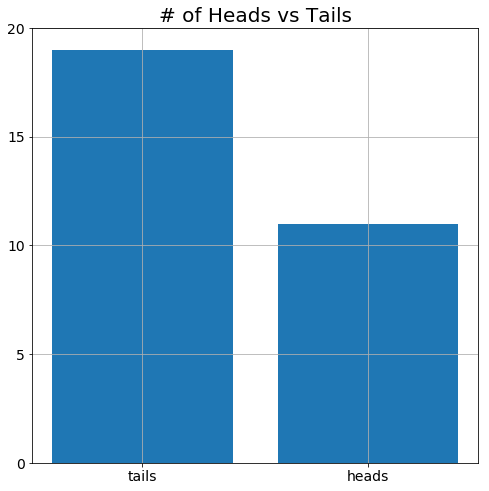

In [223]:
fig = plot_coins()
plt.show() 

### Step 3: Define the model using PyMC3 

In [243]:
# Context manager syntax. `coin_model` is **just** 
# a placeholder
with pm.Model() as coin_model: 
    # Distributions are PyMC3 objects.
    # Specify prior using Uniform object.
    p = pm.Uniform('p', 0, 1)  
    
    # Specify likelihood using Bernoulli object.
    likelihood = pm.Bernoulli('likelihood', p=p, 
                        observed=tosses)  
                        # "observed=data" is key for likelihood.

### Step 4: Hit the MCMC inference button 

In [244]:
with coin_model:
    # don't worry about this:
    step = pm.Metropolis()
    
    # focus on this, the Inference Button:
    coin_trace = pm.sample(5000, step=step, burn = 1000)

100%|██████████| 5500/5500 [00:00<00:00, 6899.53it/s]


### Check the results

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c21a385f8>,
      dtype=object)

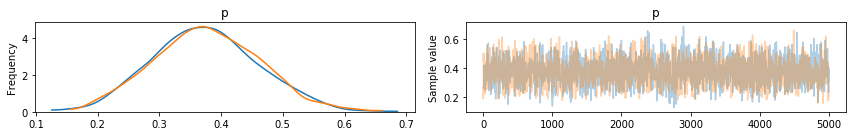

In [251]:
pm.traceplot(coin_trace)

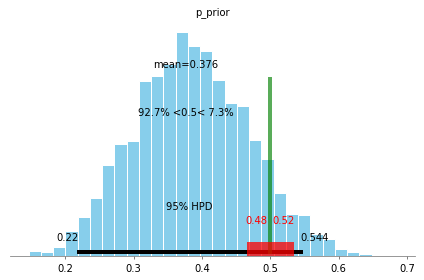

In [239]:
pm.plot_posterior(coin_trace[100:], color='#87ceeb', 
                  rope=[0.48, 0.52], point_estimate='mean', 
                  ref_val=0.5)
plt.show()

- __95% highest posterior density (HPD) __ encompasses the <font color=red>__Region of practical equivalence (ROPE)__.</font>


### Solution? - Get more data! 

# Bayesian Linear Regression - with fake data

In [369]:
%%latex

\begin{align}
\\
\large
\hspace{8 cm} Y \sim  \mathcal{N}(\mu,\,\sigma^{2}) \newline
\\
\large
\hspace{8 cm} \sigma \sim  |\mathcal{N}(\ 0,\,\ 1)| \newline
\\
\large
\hspace{8 cm} \mu  = \alpha + \sum_{j=1}^{\ 10} b_j X_j \newline
\\
\large
\hspace{8 cm} \alpha \sim  \mathcal{N}(\ 0,\,\ 10) \newline
\\
\large
\hspace{8 cm} \ b_j \sim  \mathcal{N}(\ 0,\,\ 10) \newline
\\
\end{align}

<IPython.core.display.Latex object>

In [252]:
# Set up basic parameters
num_features = 10
num_observed = 1000

In [261]:
# Choose random values for the actual alpha and betas
alpha_a = random.normal(size=1)
betas_a = random.normal(size = num_features)

# Create fake predictor data
X_train = random.normal(size=(num_observed, num_features))

In [263]:
# Calculate the actual data, but put a bit of noise in
y_a = alpha_a + np.sum(betas_a[None,:] * X_train, 1) + random.normal(size=(num_observed))

### Define the Model using PyMC3

In [326]:
# Set up the PyMC model
lin_reg_model = pm.Model()
with lin_reg_model:
    
    #define priors for intercept alpha and coefficients betas
    alpha = pm.Normal('alpha', mu=0, sd = np.sqrt(10), shape=(1))
    betas = pm.Normal('betas', mu=0, sd = np.sqrt(10), shape=(1, num_features))
    
    #define prior for sigma
    sigma = pm.HalfNormal('sigma', sd = 1)
    
    #define the deterministic random variable mean
    mean = alpha + T.dot(betas, X_train.T) #<------pay attention! We are using T.dot instead of np.dot
    
    #define the likelihood
    y = pm.Normal('y', mu = mean , sd = sigma, observed = y_a)

In [371]:
#help(pm.Normal)
#help(pm.HalfNormal)

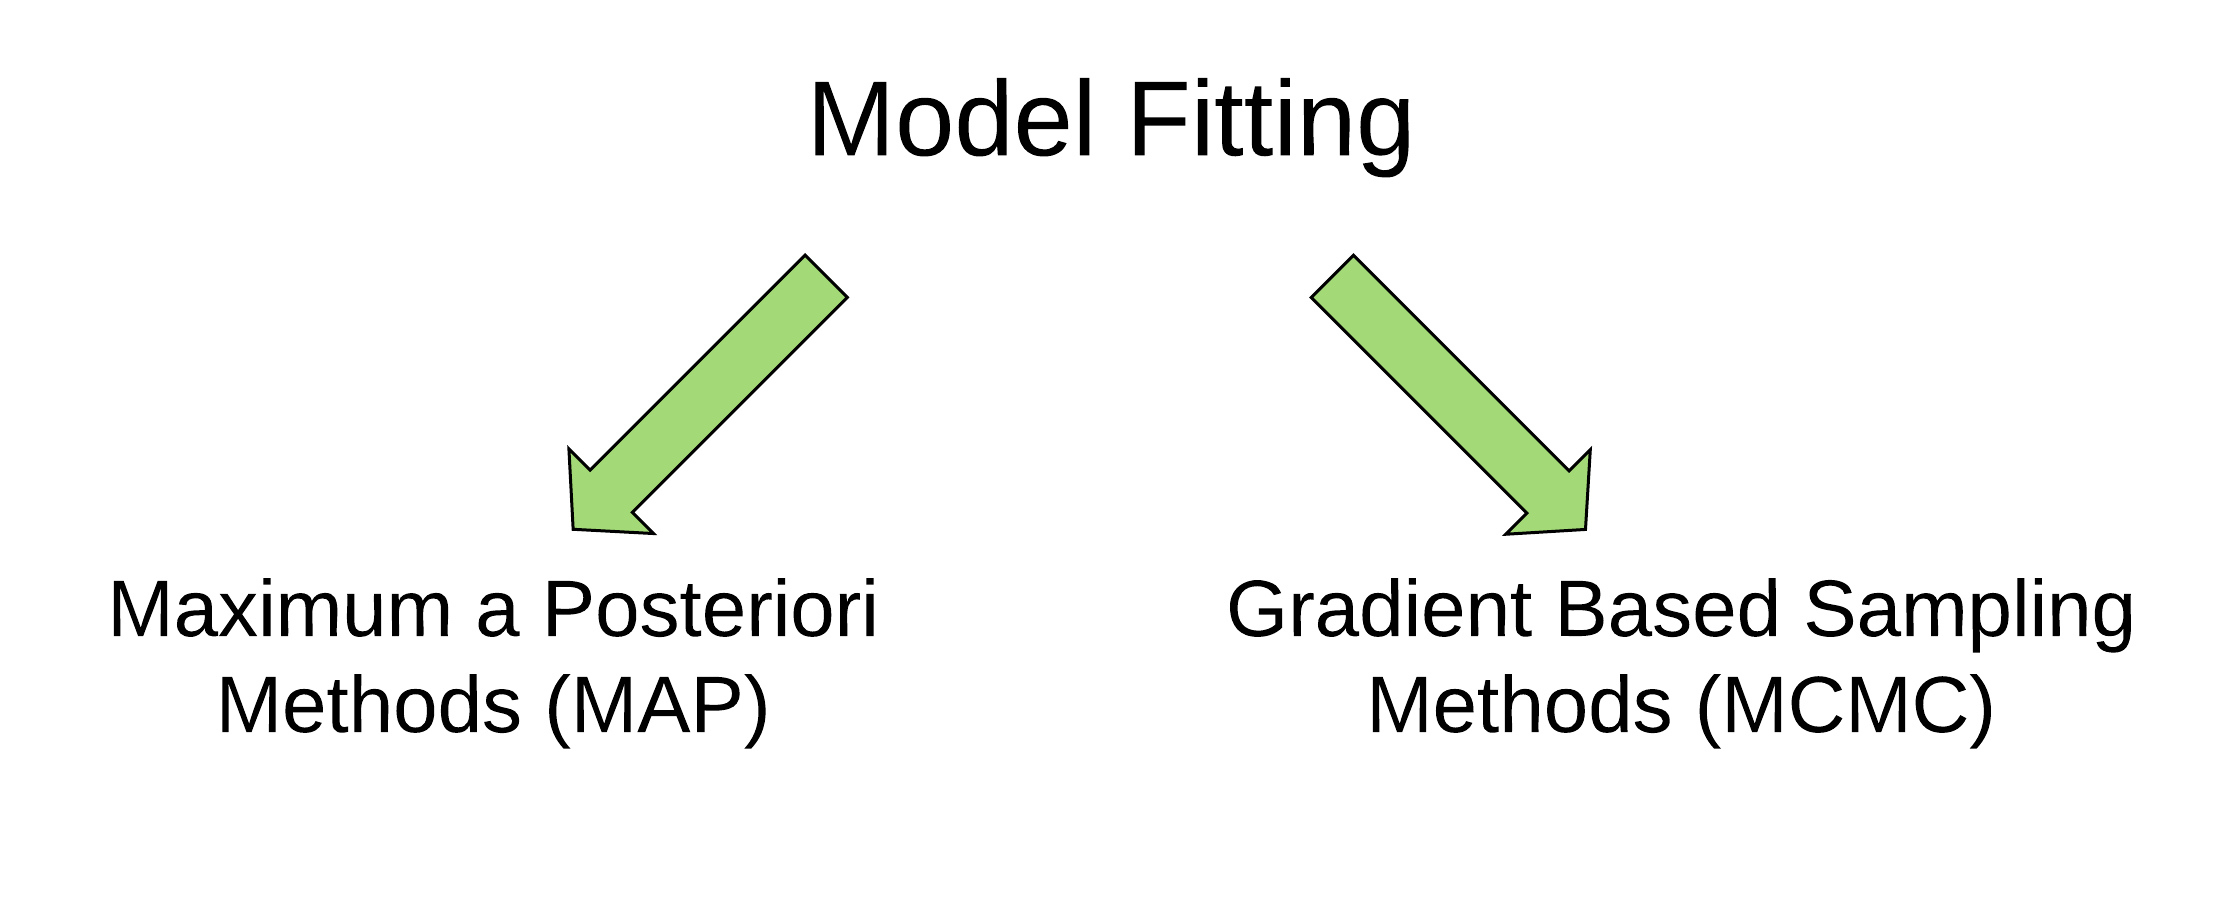

In [310]:
Image(filename= "/Users/vlad/Desktop/Warply talk/presentation.png", width = 2000, height=2000)

### 1) Maximum a posteriori methods (MAP)

In [327]:
map_estimate = pm.find_MAP(model=lin_reg_model)
print(map_estimate)

logp = -1,521.4, ||grad|| = 320.76: 100%|██████████| 21/21 [00:00<00:00, 730.05it/s]  

{'alpha': array([-1.19058081]), 'betas': array([[ 0.49547748,  0.55791599,  0.3638138 , -2.342788  ,  1.03438739,
        -0.70095845,  1.04773714, -1.13346456, -2.78201264,  1.04013287]]), 'sigma_log__': array(0.02873062), 'sigma': array(1.02914733)}


- By default, find_MAP uses the __Broyden–Fletcher–Goldfarb–Shanno (BFGS) optimization algorithm__ to find the maximum of the log-posterior.

- The __scipy.optimize__ module, allows us to use a selection of other optimization algorithms. For example, below we use __Powell’s method__ to find the MAP.

In [290]:
#import the scipy optimize module
from scipy import optimize

map_estimate = pm.find_MAP(model= lin_reg_model, fmin = optimize.fmin_powell)
print(map_estimate)

/Users/vlad/anaconda/lib/python3.6/site-packages/pymc3/tuning/starting.py:92: UserWarning: In future versions, set the optimization algorithm with a string. For example, use `method="L-BFGS-B"` instead of `fmin=sp.optimize.fmin_l_bfgs_b"`.
  warnings.warn('In future versions, set the optimization algorithm with a string. '
logp = -1,450.4:  14%|█▍        | 699/5000 [00:00<00:03, 1123.38it/s]


Optimization terminated successfully.
         Current function value: 1439.808913
         Iterations: 6
         Function evaluations: 699
{'alpha': array([-1.19062108]), 'betas': array([[ 0.49562245,  0.55789266,  0.36381145, -2.34279304,  1.0343881 ,
        -0.70095307,  1.0477697 , -1.13347253, -2.78204945,  1.040149  ]]), 'sigma_log__': array(0.02833175), 'sigma': array(1.02873692)}


### 2) Gradient-based sampling methods (MCMC)

In [291]:
# Sample from the model
with lin_reg_model:
    step = pm.NUTS()
    nuts_trace = pm.sample(4000, step)

100%|██████████| 4500/4500 [00:19<00:00, 232.13it/s]


- PyMC3 allows us to define __reasonable starting point__ for sampling which can be important for efficient sampling:

In [293]:
#define a reasonable starting point
with lin_reg_model:
    # obtain starting values via MAP
    start = pm.find_MAP(fmin=optimize.fmin_powell)
    
    # instantiate sampler
    step = pm.NUTS(scaling=start)
    
    # draw 4000 posterior samples
    trace = pm.sample(4000, step, start=start)

/Users/vlad/anaconda/lib/python3.6/site-packages/pymc3/tuning/starting.py:92: UserWarning: In future versions, set the optimization algorithm with a string. For example, use `method="L-BFGS-B"` instead of `fmin=sp.optimize.fmin_l_bfgs_b"`.
  warnings.warn('In future versions, set the optimization algorithm with a string. '
logp = -1,450.4:  14%|█▍        | 690/5000 [00:00<00:03, 1279.99it/s]

Optimization terminated successfully.
         Current function value: 1439.808913
         Iterations: 6
         Function evaluations: 699


Exception ignored in: <bound method tqdm.__del__ of logp = -1,450.4:  14%|█▍        | 699/5000 [00:01<00:03, 1279.99it/s]>
Traceback (most recent call last):
  File "/Users/vlad/anaconda/lib/python3.6/site-packages/tqdm/_tqdm.py", line 882, in __del__
    self.close()
  File "/Users/vlad/anaconda/lib/python3.6/site-packages/tqdm/_tqdm.py", line 1087, in close
    self._decr_instances(self)
  File "/Users/vlad/anaconda/lib/python3.6/site-packages/tqdm/_tqdm.py", line 439, in _decr_instances
    cls._instances.remove(instance)
  File "/Users/vlad/anaconda/lib/python3.6/_weakrefset.py", line 109, in remove
    self.data.remove(ref(item))
KeyError: <weakref at 0x1c2200d8b8; to 'tqdm' at 0x1c205b4b70>
100%|██████████| 4500/4500 [00:40<00:00, 111.65it/s]


In [339]:
#trace['alpha']

### Check the results

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c2427a208>,
      dtype=object)

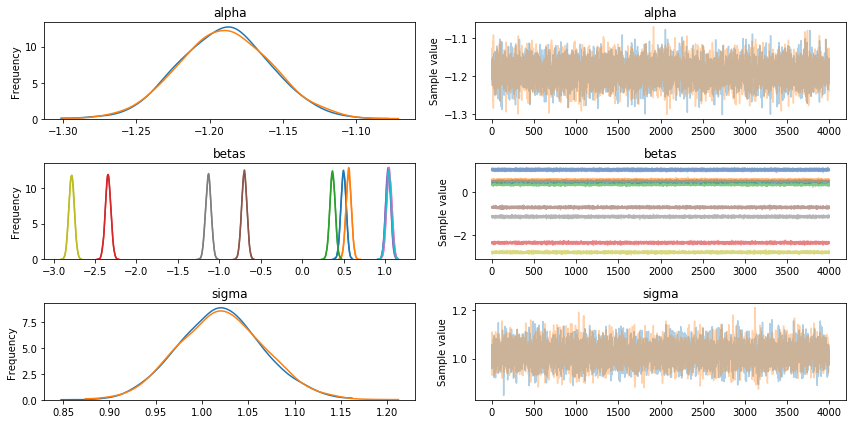

In [294]:
pm.traceplot(trace)

# Bayesian Linear Regression - with actual data!

### 1) Using scikit-learn package

In [374]:
from sklearn.datasets import load_boston

In [375]:
boston = load_boston()

In [385]:
boston

{'DESCR': "Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per

In [485]:
#load boston data into a Pandas DataFrame
boston_features = pd.DataFrame(data = boston['data'], columns = boston['feature_names'])

In [486]:
#display first five rows
boston_df.head(n = 5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [487]:
#load target variable into a dataframe
boston_target = pd.DataFrame(boston.target)

In [488]:
#split data into test/train
X_train, X_test, Y_train, Y_test = train_test_split(boston_features, boston_target, test_size=0.3)

In [489]:
#initialize Linear Regression Model
linearRegression = LinearRegression()

In [490]:
#fit Linear Regression on Data
linearRegression.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [491]:
# Make predictions using the testing set
y_pred = linearRegression.predict(X_test)

In [492]:
print('Variance score: %.2f' % r2_score(Y_test, y_pred))

Variance score: 0.80


In [493]:
#coefficients of our linear model
linearRegression.coef_

array([[-8.83329780e-02,  5.03955252e-02, -2.64850454e-02,
         3.50782047e+00, -1.54100400e+01,  3.61413565e+00,
         4.31714730e-04, -1.45201830e+00,  2.36736699e-01,
        -8.67714306e-03, -8.00338497e-01,  8.57138143e-03,
        -5.47430410e-01]])

In [494]:
#intercept - alpha
linearRegression.intercept_

array([33.77024373])

### Using PyMC3 

In [495]:
#transform NumPy arrays to Theano tensors 
model_input = theano.shared(np.array(X_train))
model_output = theano.shared(np.array(Y_train))

In [496]:
# Set up the PyMC model and define the priors for each unknown parameter
lin_reg_model_2 = pm.Model()

with lin_reg_model_2:
    
    #define priors for intercept alpha and coefficients betas
    alpha = pm.Normal('alpha', mu=0, tau= 10.**-2, shape=(1))
    betas = pm.Normal('betas', mu=0, tau=10. ** -2, shape=(1, len(X_train.columns)))
    
    #define prior for the sd
    sigma = pm.HalfNormal('sigma', tau = 1)
    
    #define prior for the mean
    mean = alpha + T.dot(model_input, betas.T)
    
    #define the likelihood
    y = pm.Normal('y', mu = mean , tau = sigma ** -2, observed = model_output)

In [497]:
# Note: If you don't specify a sampler, PyMC3 by default uses the NUTS sampler
with lin_reg_model_2:
    nuts_trace = pm.sample(8000, tune = 3000)

100%|██████████| 11000/11000 [05:48<00:00, 31.56it/s]


We get a warning:

__WARNING: pymc3: The acceptance probability does not match the target.__
        
__Solution:__ increase the tuning parameter (eg. tune=1000)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c268c6160>,
      dtype=object)

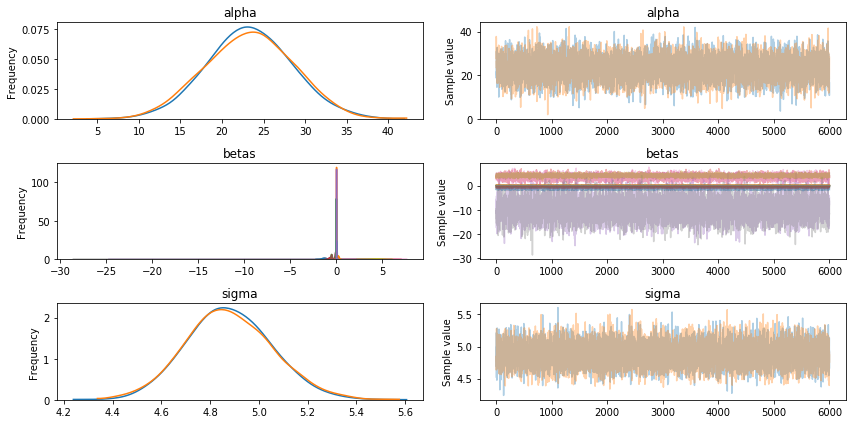

In [498]:
#find the posteriors and the trace plots
pm.traceplot(nuts_trace[2000:])

In [499]:
#get the summary
pm.summary(nuts_trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
alpha__0,23.333134,5.186231,0.057100,13.030849,33.329076,8118.819498,1.000001
betas__0_0,-0.083071,0.039365,0.000274,-0.160037,-0.007608,14249.627440,1.000075
betas__0_1,0.050988,0.017578,0.000169,0.015481,0.084438,11349.716528,1.000088
betas__0_2,-0.039912,0.074631,0.000655,-0.187848,0.104412,12162.371974,0.999979
betas__0_3,3.557909,1.012229,0.006524,1.592227,5.546788,18112.938375,0.999966
betas__0_4,-9.581727,4.162818,0.035545,-17.711475,-1.354805,12179.856550,1.000055
betas__0_5,4.181966,0.489951,0.005036,3.223727,5.129809,9358.269598,0.999939
betas__0_6,-0.002822,0.015925,0.000131,-0.034575,0.027641,13183.897946,0.999942
betas__0_7,-1.306673,0.238493,0.002474,-1.758452,-0.826602,9240.218371,1.000067
betas__0_8,0.196417,0.084307,0.000843,0.037445,0.367993,10191.833870,1.000161


In [500]:
#coefficients of our linear model
linearRegression.coef_

array([[-8.83329780e-02,  5.03955252e-02, -2.64850454e-02,
         3.50782047e+00, -1.54100400e+01,  3.61413565e+00,
         4.31714730e-04, -1.45201830e+00,  2.36736699e-01,
        -8.67714306e-03, -8.00338497e-01,  8.57138143e-03,
        -5.47430410e-01]])

In [501]:
#intercept - alpha
linearRegression.intercept_

array([33.77024373])

### Evaluate the model

In [518]:
# Create posterior predictive samples
ppc = pm.sample_ppc(nuts_trace[4000:], model = lin_reg_model_2, samples = 1000)

100%|██████████| 1000/1000 [00:00<00:00, 1881.45it/s]


In [519]:
# Replace shared variables with testing set
model_input.set_value(np.array(X_test))
model_output.set_value(np.array(Y_test))

In [520]:
#find the mean
pred = ppc['y'].mean(axis=0)

In [523]:
print('Variance score using MCMC: %.2f' % r2_score(Y_test, pred))

Variance score using MCMC: 0.79


#  COAL MINING DISASTERS

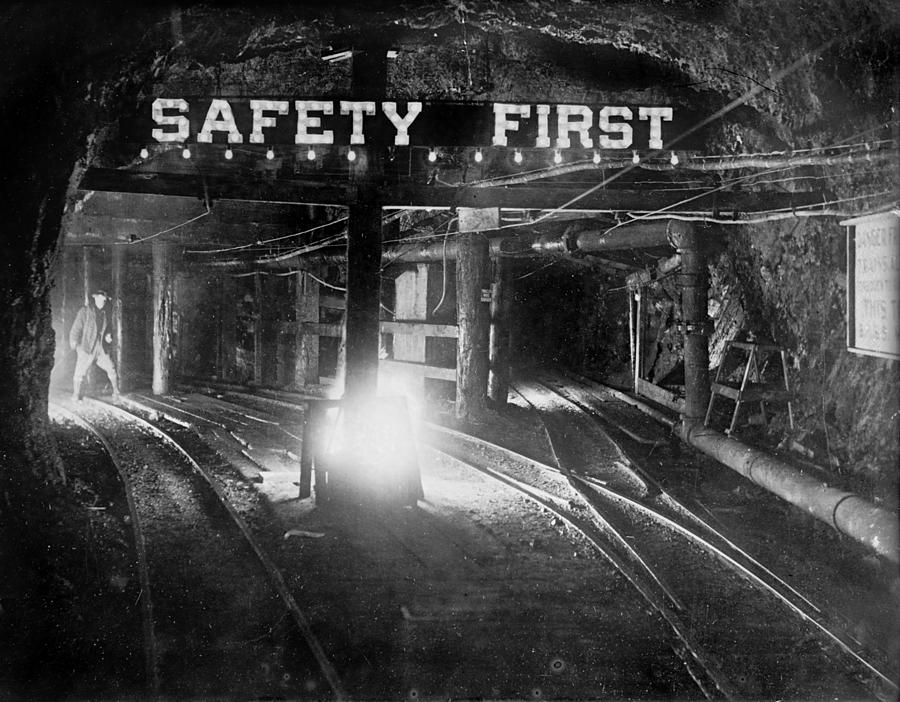

In [608]:
Image(filename= "/Users/vlad/Desktop/Warply talk/disasters.jpg", width = 1000, height=1000)

This case study implements a change-point model for a time series of recorded coal mining disasters in the UK from 1851 to 1962 (Jarrett, 1979).  The annual number of disasters is thought to have been affected by changes in safety regulations during this period.

In [457]:
import numpy.ma as ma
#load data into a MaskedArray
disaster_data = np.ma.masked_values([4, 5, 4, 0, 1, 4, 3, 4, 0, 6, 3, 3,
                                     4, 0, 2, 6, 3, 3, 5, 4, 5, 3, 1, 4,
                                     4, 1, 5, 5, 3, 4, 2, 5,2, 2, 3, 4, 2,
                                     1, 3, -999, 2, 1, 1, 1, 1, 3, 0, 0,1,
                                     0, 1, 1, 0, 0, 3, 1, 0, 3, 2, 2, 0, 1,
                                     1, 1,0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0,
                                     1, 1, 0, 2,3, 3, 1, -999, 2, 1, 1, 1, 1,
                                     2, 4, 2, 0, 0, 1, 4,0, 0, 0, 1, 0, 0, 0,
                                     0, 0, 1, 0, 0, 1, 0, 1], value=-999)

In [461]:
#display data
disaster_data

masked_array(data=[4, 5, 4, 0, 1, 4, 3, 4, 0, 6, 3, 3, 4, 0, 2, 6, 3, 3,
                   5, 4, 5, 3, 1, 4, 4, 1, 5, 5, 3, 4, 2, 5, 2, 2, 3, 4,
                   2, 1, 3, --, 2, 1, 1, 1, 1, 3, 0, 0, 1, 0, 1, 1, 0, 0,
                   3, 1, 0, 3, 2, 2, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 2,
                   1, 0, 0, 0, 1, 1, 0, 2, 3, 3, 1, --, 2, 1, 1, 1, 1, 2,
                   4, 2, 0, 0, 1, 4, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
                   1, 0, 1],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False,  True,
                   False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False,
      

In [524]:
year = np.arange(1851, 1962)

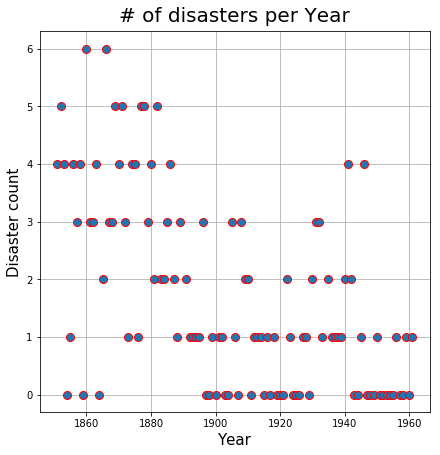

In [542]:
#Define the plot
fig, ax = plt.subplots(figsize = (7,7))

ax.plot(year, disaster_data,'o', markersize=8, markeredgecolor = 'r')
ax.set_title('# of disasters per Year', size = 20, y= 1.009)
ax.set_ylabel("Disaster count", size = 15)
ax.set_xlabel("Year", size = 15)
ax.grid(True)

### Model definition

In [592]:
%%latex

\begin{align}
\\
\large
\hspace{10 cm} D_t \sim  \mathcal{P}(\ r_t) \newline
\\
\large
\ r_t=
\begin{cases}
    l, & \text{if}\ t<s \\
    e, & \text{otherwise}
\end{cases} \newline 
\\
\large
\ s \sim  \mathcal{U}(\ t_l,\ t_h) \newline
\\
\large
\ e \sim  \mathcal{exp}(\ 1) \newline
\\
\large
\ l \sim  \mathcal{exp}(\ 1) \newline
\\
\end{align}

<IPython.core.display.Latex object>

- $D_t$: Number of disasters in year t

- $r_t$:  The rate parameter of the Poisson distribution of disasters in year t

- $s$:  The year in which the rate parameter changes (the switchpoint)

- $e$:  The rate parameter before the switchpoints

- $l$ :  The rate parameter after the switchpoints

- $t_l$,$t_h$:  The lower and upper boundaries of year t

### Define the model in pymc3 

In [599]:
#import switch
#from pymc3.math import switch
from theano.tensor import switch 

In [602]:
with pm.Model() as disaster_model:
    switchpoint = pm.DiscreteUniform('switchpoint', lower=year.min(),upper=year.max(), testval=1900)
    
    # Priors for pre- and post-switch rates number of disasters
    early_rate = pm.Exponential('early_rate', 1)
    late_rate = pm.Exponential('late_rate', 1)
    
    # Allocate appropriate Poisson rates to years before and after current
    rate = switch(switchpoint >= year, early_rate, late_rate)
    
    disasters = pm.Poisson('disasters', rate, observed=disaster_data)

### Hit the MCMC button

In [604]:
with disaster_model:
    #define a MCMC sampler for each step
    step1 = pm.NUTS([early_rate, late_rate])
    step2 = pm.Metropolis([switchpoint, disasters.missing_values[0]])
    
    disasters_trace = pm.sample(5000, step=[step1, step2])

100%|██████████| 5500/5500 [00:08<00:00, 620.04it/s]


### Display the traceplots 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c205bf4e0>,
      dtype=object)

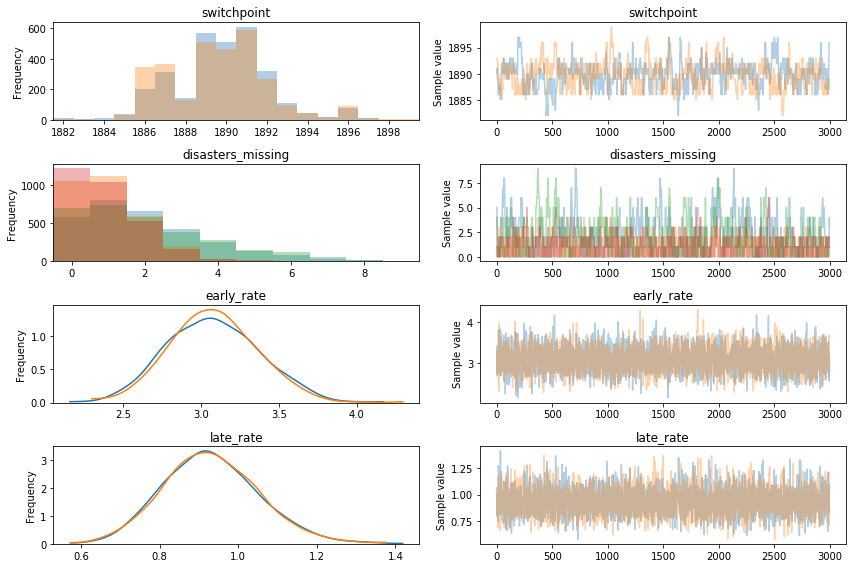

In [605]:
#find the posteriors and the trace plots
pm.traceplot(disasters_trace[2000:])

# Stochastic Volatility

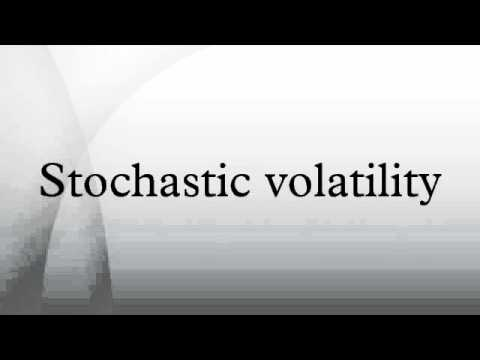

In [3]:
Image(filename= "/Users/vlad/Desktop/Warply talk/stochasticvolatility.jpg", width = 1000, height=1000)

### Model Definition 

In [12]:
%%latex

\begin{align}
\\
\large
\hspace{10 cm} σ \sim  \mathcal{exp}(\ 50) \newline
\\
\large
\ ν \sim  \mathcal{exp}(\ .1) \newline
\\
\large
\ s_i \sim  \mathcal{N}(\ s_{i-1},\ σ^{-2}) \newline
\\
\large
\ log(y_i) \sim  \mathcal{T}(\ ν, \ 0, \ exp(-2s_i)) \newline
\\
\end{align}

<IPython.core.display.Latex object>

### Data 

In [619]:
#load data into a jupiter notebook
path = "/Users/vlad/Desktop/Warply talk/SP500.txt"
returns = pd.read_csv(path, index_col = 0, parse_dates = True)

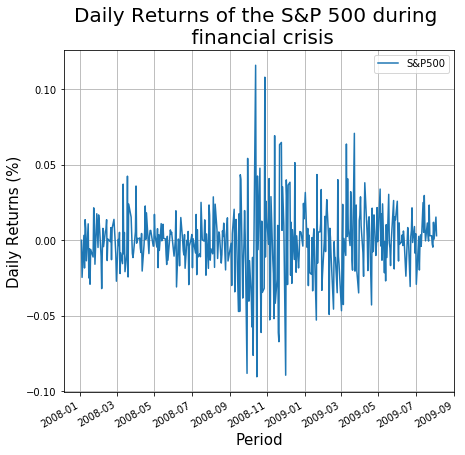

In [627]:
fig, ax = plt.subplots(figsize = (7,7))
ax.set_title('Daily Returns of the S&P 500 during \n financial crisis', size = 20)
returns.plot(ax = ax)
ax.set_xlabel('Period', size = 15)
ax.set_ylabel('Daily Returns (%)', size = 15)
ax.grid(True)

### Model Implementation in PyMC3

In [631]:
with pm.Model() as sp500_model:
    
    nu = pm.Exponential('nu', 1./10, testval=5.)
    
    sigma = pm.Exponential('sigma', 1./.02, testval=.1)
    
    s = pm.GaussianRandomWalk('s', sigma**-2, shape=len(returns))
    
    volatility_process = pm.Deterministic('volatility_process', np.exp(-2*s)) #<------Could use Theano/PyMc3
    
    r = pm.StudentT('r', nu, lam=1/volatility_process, observed=returns['S&P500'])

In PyMC3, variables with __positive support__ like Exponential are __transformed with a log transform__,making sampling more __robust__.  Behind the scenes, the variable is transformed to the unconstrained space (named “variableName.log”) and added to the model for sampling.

### Hit the MCMC button 

In [633]:
import scipy

with sp500_model:
    
    start = pm.find_MAP(vars=[s], fmin=scipy.optimize.fmin_l_bfgs_b)
    
    step = pm.NUTS(scaling=start)
    trace = pm.sample(100, step, progressbar=False)
    
    # Start next run at the last sampled position.
    step = pm.NUTS(scaling=trace[-1], gamma=.25)
    trace = pm.sample(2000, step, start=trace[-1], progressbar=False, njobs=2)

/Users/vlad/anaconda/lib/python3.6/site-packages/pymc3/tuning/starting.py:92: UserWarning: In future versions, set the optimization algorithm with a string. For example, use `method="L-BFGS-B"` instead of `fmin=sp.optimize.fmin_l_bfgs_b"`.
  warnings.warn('In future versions, set the optimization algorithm with a string. '
logp = 1,568.5:   2%|▏         | 87/5000 [00:00<00:04, 1003.24it/s]
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c18b68438>,
      dtype=object)

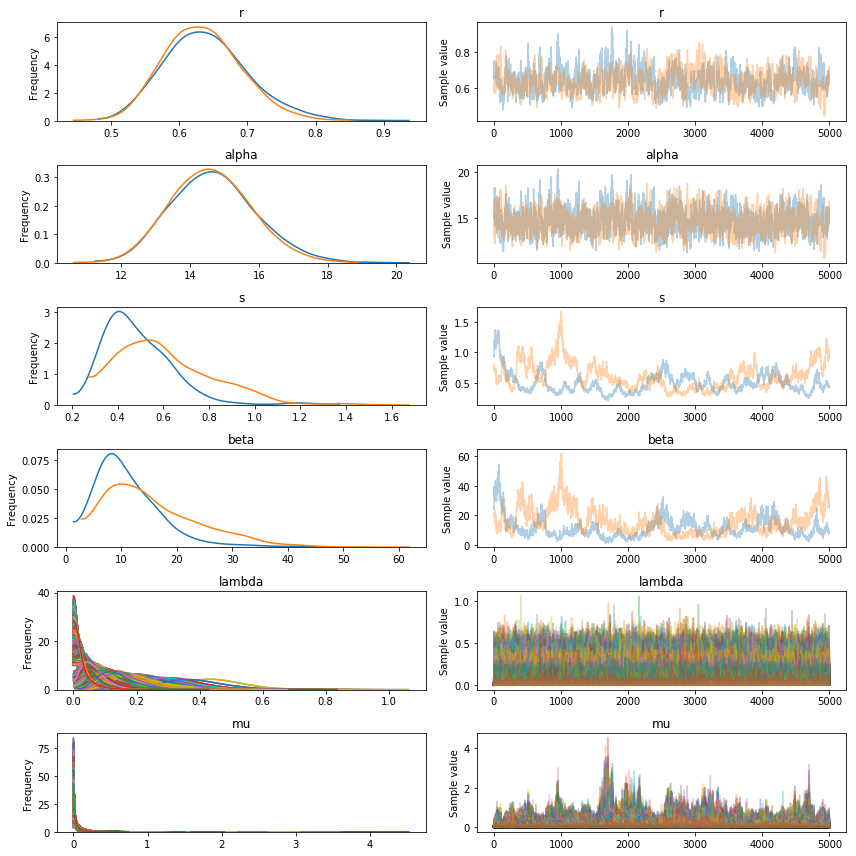

In [34]:
pm.traceplot(trace)

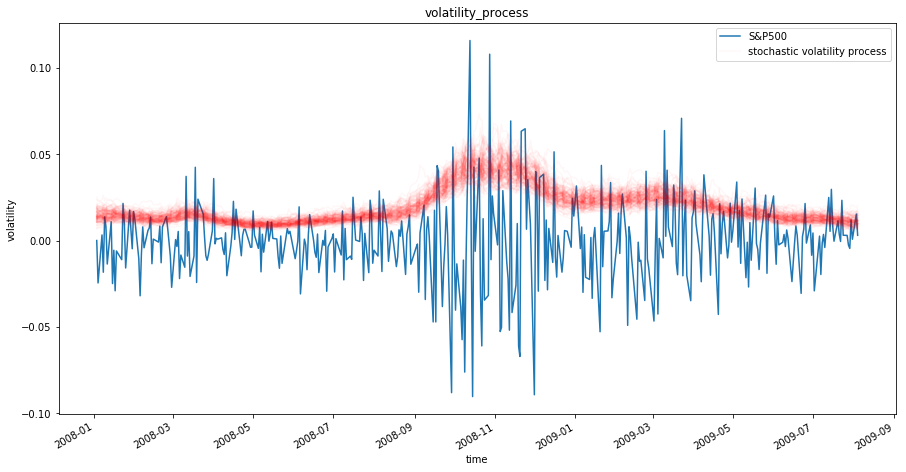

In [636]:
fig, ax = plt.subplots(figsize=(15, 8))
returns.plot(ax=ax)
ax.plot(returns.index, 1/np.exp(trace['s',::30].T),'r', alpha=.03)
ax.set(title='volatility_process', xlabel='time', ylabel='volatility')
ax.legend(['S&P500','stochastic volatility process'])

# Customer Lifetime Value

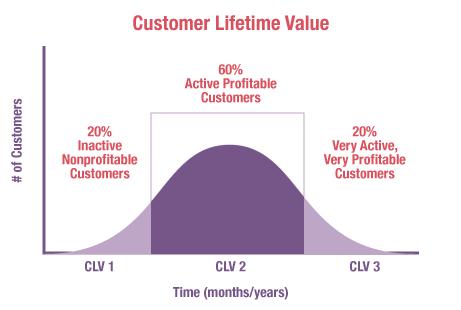

In [14]:
Image(filename= "/Users/vlad/Desktop/Warply talk/clv.png", width = 1000, height=1000)

### Dataset 

In [18]:
from lifetimes.datasets import load_dataset

cdnow_transactions = load_dataset(
    'CDNOW_sample.txt', 
    header=None, 
    delim_whitespace=True, 
    names=['customer_id', 'customer_index', 'date', 'quantity', 'amount'],
    converters={'date': lambda x: pd.to_datetime(x, format="%Y%m%d")}
)

cdnow_transactions.head()

,customer_id,customer_index,date,quantity,amount
0,4,1,1997-01-01,2,29.33
1,4,1,1997-01-18,2,29.73
2,4,1,1997-08-02,1,14.96
3,4,1,1997-12-12,2,26.48
4,21,2,1997-01-01,3,63.34


In [21]:
#cdnow_transactions['date'].min()
#cdnow_transactions['date'].max()

Let's create the Recency-Frequency-(Monetary) matrix used in Pareto/NBD Model

- __frequency:__ number of repeat purchases

- __recency:__ time of most recent purchase

- __T:__ total elapsed time since customer's first purchase

In [24]:
# lifetimes provides a transaction log -> rfm util function
import lifetimes

rfm = lifetimes.utils.summary_data_from_transaction_data(
    cdnow_transactions,
    'customer_id',
    'date',
    observation_period_end=pd.to_datetime('1997-09-30'),
    freq='W'
)

rfm.head()

,frequency,recency,T
customer_id,,,
4,2.0,30.0,39.0
18,0.0,0.0,39.0
21,1.0,2.0,39.0
50,0.0,0.0,39.0
60,0.0,0.0,35.0


### Model implementation 

### PyMC3 Implementation

In [25]:
from pymc3.math import exp, log

class ParetoNBD(pm.Continuous):
    """
    Custom distribution class for Pareto/NBD likelihood.
    """
    
    def __init__(self, lambda_, mu, *args, **kwargs):
        super(ParetoNBD, self).__init__(*args, **kwargs)
        self.lambda_ = lambda_
        self.mu = mu
        
    def logp(self, x, t_x, T):
        """
        Loglikelihood function for and indvidual customer's purchasing rate \lambda
        and lifetime \mu given their frequency, recency and time since first purchase.
        """
        
        log_lambda = log(self.lambda_)
        log_mu = log(self.mu)
        mu_plus_lambda = self.lambda_ + self.mu
        log_mu_plus_lambda = log(mu_plus_lambda)
        
        p_1 = x * log_lambda + log_mu - log_mu_plus_lambda - t_x * mu_plus_lambda
        p_2 = (x + 1) * log_lambda - log_mu_plus_lambda - T * mu_plus_lambda
        
        return log(exp(p_1) + exp(p_2))

In [26]:
# Extract data for model following notation from Fader/Hardie
N = rfm.shape[0] # number of customers
x = rfm['frequency'].values
t_x = rfm['recency'].values
T = rfm['T'].values

We place positive-bounded, non-informative priors on the $r$, $\alpha$, $s$, and $\beta$ hyperparameters.

In [30]:
pnbd_model = pm.Model()

with pnbd_model:
    
    # Uninformative priors on model hyperparameters see Polson and Scott 
    # https://projecteuclid.org/download/pdfview_1/euclid.ba/1354024466
    r = pm.HalfCauchy('r', beta=2)
    alpha = pm.HalfCauchy('alpha', beta=2)
    s = pm.HalfCauchy('s', beta=2)
    beta = pm.HalfCauchy('beta', beta=2)
    
    # Gamma prior on purchasing rate parameter lambda
    lambda_ = pm.Gamma('lambda', alpha=r, beta=alpha, shape=N, testval=np.random.rand(N))
    # Gamma prior on lifetime parameter mu
    mu = pm.Gamma('mu', alpha=s, beta=beta, shape=N, testval=np.random.rand(N))

    # Custom distribution for Pareto-NBD likelihood function
    loglikelihood = ParetoNBD("loglikelihood", mu=mu, lambda_=lambda_, observed={'x': x, 't_x': t_x, 'T': T})
    
    # Sample the model
    trace = pm.sample(5000, init=None)

Multiprocess sampling (2 chains in 2 jobs)
NUTS: [mu_log__, lambda_log__, beta_log__, s_log__, alpha_log__, r_log__]
100%|██████████| 5500/5500 [07:41<00:00, 11.92it/s]
The acceptance probability does not match the target. It is 0.888778075463224, but should be close to 0.8. Try to increase the number of tuning steps.
The gelman-rubin statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


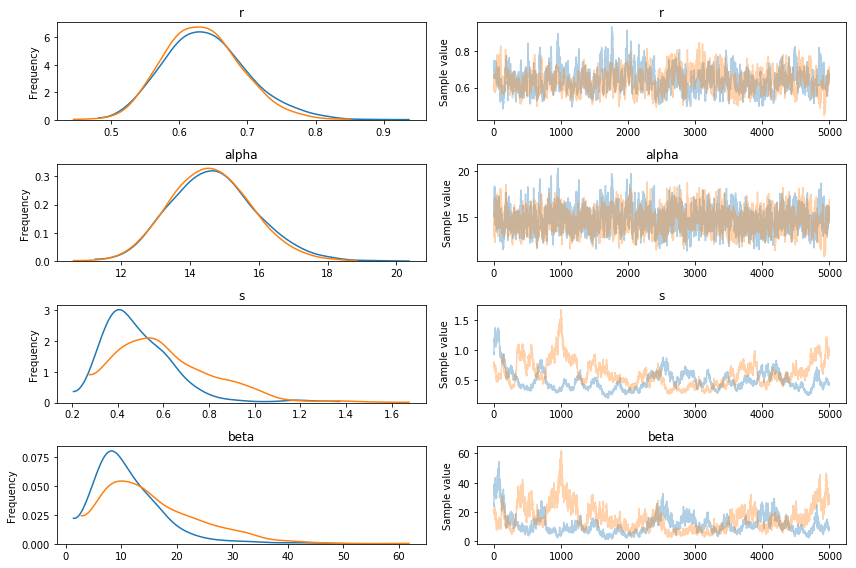

In [31]:
# Traceplots to check for convergence
_ = pm.traceplot(trace, varnames=['r','alpha','s','beta'])

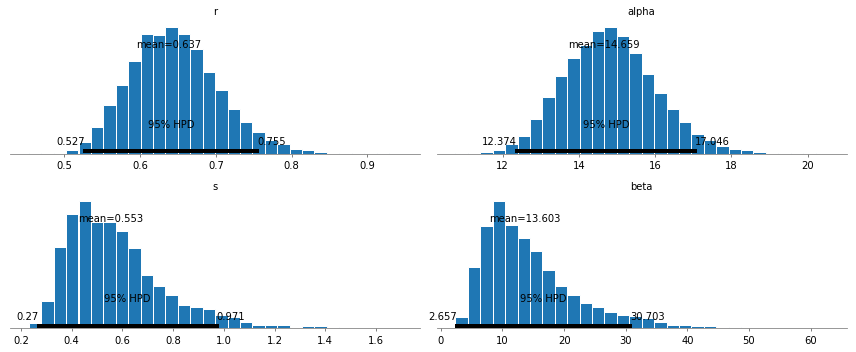

In [32]:
_ = pm.plot_posterior(trace, varnames=['r','alpha','s', 'beta'])